# Term Paper, BAN436

Candidates: 140, 150 and 175

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import matplotlib.ticker as mticker


from pandas_datareader import data


# Task1

## a)

In [2]:
from pandas_datareader import wb

#countries =pdr.wb.country_codes

In [3]:
Emis = wb.download(indicator='EN.ATM.CO2E.KT', country=['all'], start=2018, end=2018)

Pop = wb.download(indicator='SP.POP.TOTL', country=['all'],start=2018, end=2018)

In [4]:

Pop_Regions = Pop.iloc[:48]
Emis_Regions = Emis.iloc[:48]
Pop = Pop.iloc[49:]
Emis = Emis.iloc[49:]

We download the data for emission and population and then we filter the data, so that we have datas with only countries and only regions seperately.

In [5]:

Emis.reset_index(inplace=True)
Pop.reset_index(inplace=True)

In [6]:
Emis = Emis.rename(columns={'country':'Country','year':'Year','EN.ATM.CO2E.KT':'Emission'}).copy()
Pop = Pop.rename(columns={'country':'Country','year':'Year','SP.POP.TOTL':'Population'}).copy()


Then we use the function reset_index() and rename() to clean and tidy the data for optimal use.

In [7]:
Emis_Pop = Emis.merge(Pop, on=['Country','Year'],how="outer")

In [9]:
Emis_Pop.dropna(axis=0,inplace=True)

Then we merge the two datasets on Country and Year, and then removing all N/A.

## b)

In [10]:
Emis_Pop["Emis_per_Cap"]=(Emis_Pop["Emission"]/Emis_Pop["Population"])

We create a new column with Emission per capita. 

C:\Users\47930\AppData\Local\Temp/ipykernel_1668/1321246651.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=Emis_Pop["Country"],rotation=90,size=7)
C:\Users\47930\AppData\Local\Temp/ipykernel_1668/1321246651.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels=Emis_Pop["Country"],rotation=90,size=7)


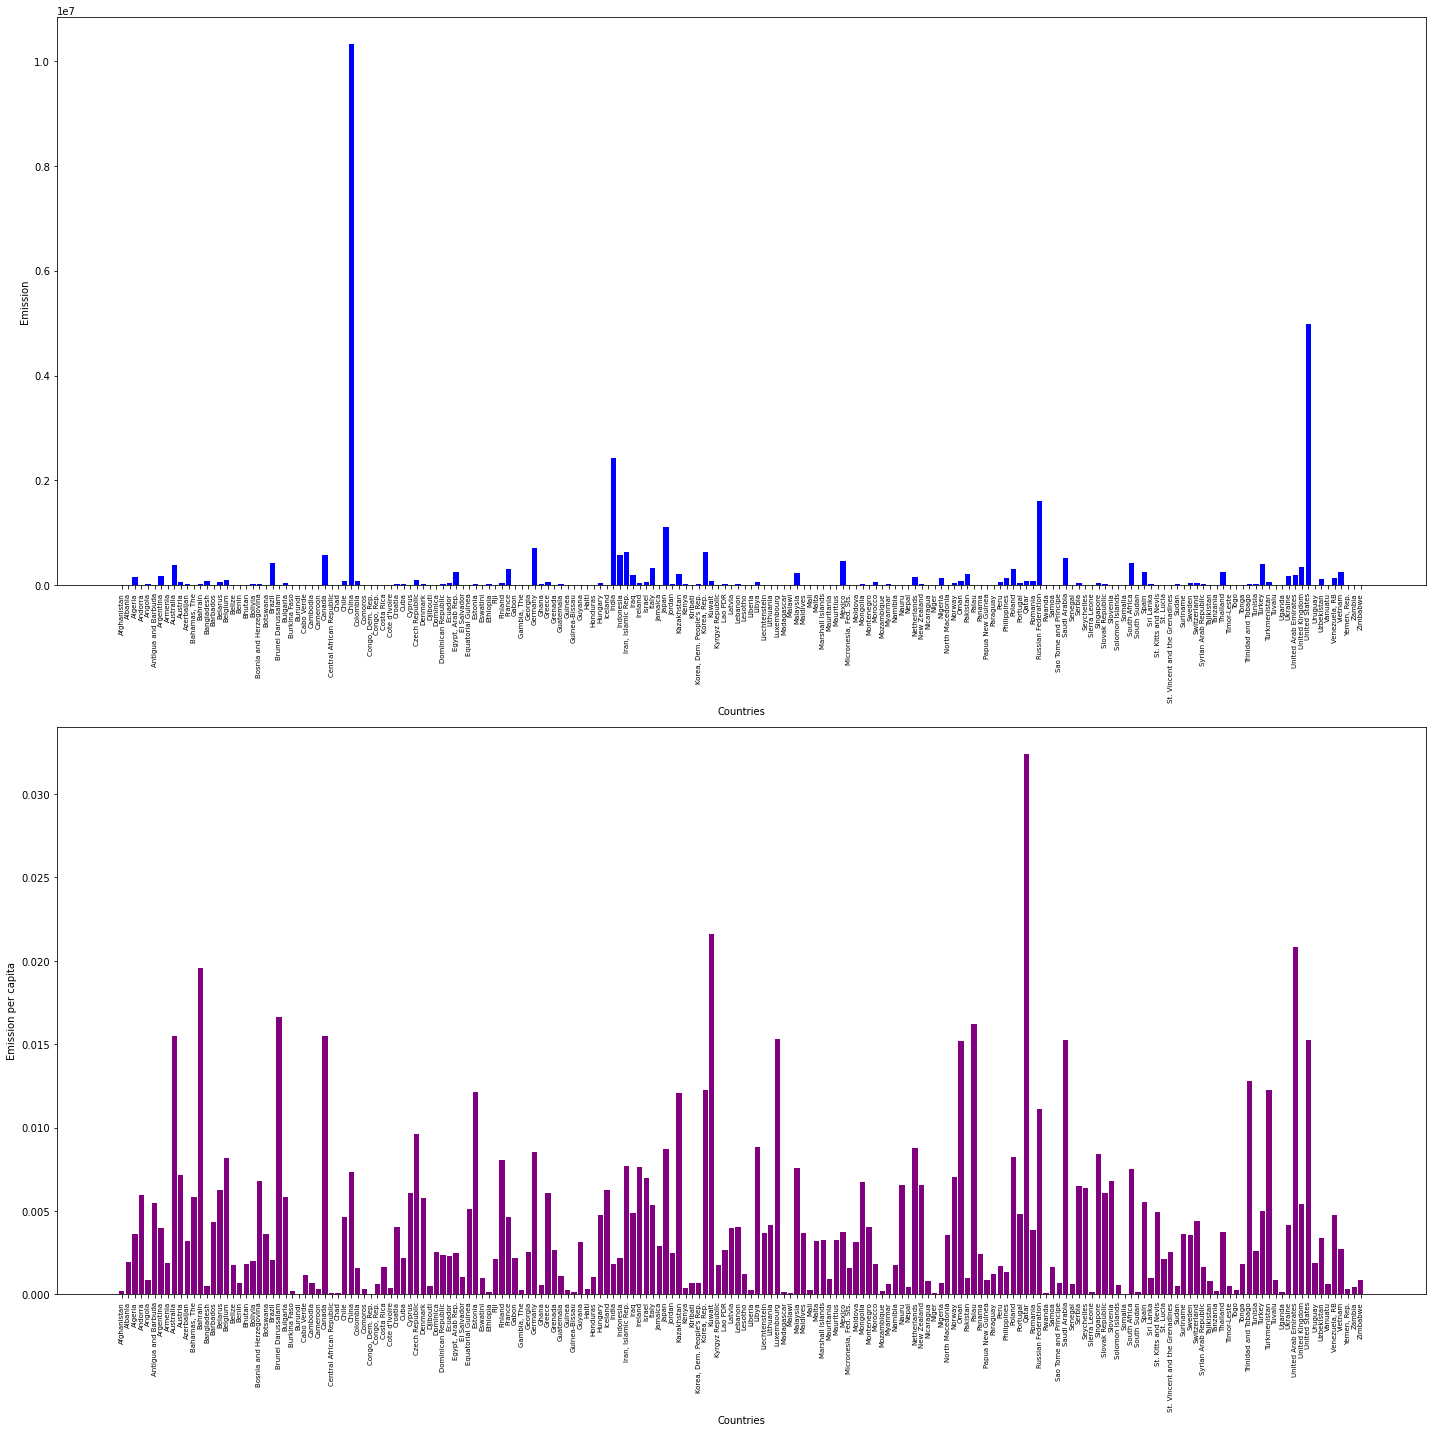

In [11]:

#Making plots for total and per capita emission.
fig, ax = plt.subplots(nrows = 2,         
                       ncols = 1,         
                       figsize = (20, 20))


ax[0].bar(Emis_Pop["Country"],Emis_Pop["Emission"],color="Blue")
ax[1].bar(Emis_Pop["Country"],Emis_Pop["Emis_per_Cap"],color="Purple")

ax[0].set_xticklabels(labels=Emis_Pop["Country"],rotation=90,size=7)
ax[1].set_xticklabels(labels=Emis_Pop["Country"],rotation=90,size=7)


ax[0].set_ylabel("Emission")
ax[1].set_ylabel("Emission per capita")

ax[0].set_xlabel("Countries")
ax[1].set_xlabel("Countries")

fig.tight_layout()


plt.savefig('mandatory/Emission_pCap_plot.png')


b)
We see from the graphs above that we do not observe the same pattern in per capital CO2 emissions as we do in total CO2.

From the first graph it looks like a handful countries are very bad when it comes to emissions and the rest are good. But when we look into the second graph we see that this is not the case. Per capita emission is much more even, and the big differences in the first graph is because some countries have huge population and therefore huge emissions.


In [12]:
Pop_Regions.reset_index(inplace=True)
Emis_Regions.reset_index(inplace=True)
Pop_Regions = Pop_Regions.rename(columns={'country':'Country','year':'Year','SP.POP.TOTL':'Population'}).copy()
Emis_Regions = Emis_Regions.rename(columns={'country':'Country','year':'Year','EN.ATM.CO2E.KT':'Emission'}).copy()
Emis_Pop_Regions = Emis_Regions.merge(Pop_Regions, on=['Country','Year'],how="outer")
Emis_Pop_Regions.dropna(axis=0,inplace=True)

Emis_Pop_Regions_HighIncome = Emis_Pop_Regions[Emis_Pop_Regions["Country"]=='High income']
Emis_Pop_Regions_LowIncome = Emis_Pop_Regions[Emis_Pop_Regions["Country"]=='Low income']
Emis_Pop_Regions_Income = Emis_Pop_Regions_HighIncome.append(Emis_Pop_Regions_LowIncome,ignore_index=True)
Emis_Pop_Regions_Income["Emis_per_Cap"] = (Emis_Pop_Regions_Income["Emission"]/Emis_Pop_Regions_Income["Population"])


Here we have a messy code, but here we clean and tidy the datas with regions in the same way as we did with the countries. And then we filter out "High Income" and "Low Income". The purpose of this is to compare high-income countries and low-income countries.

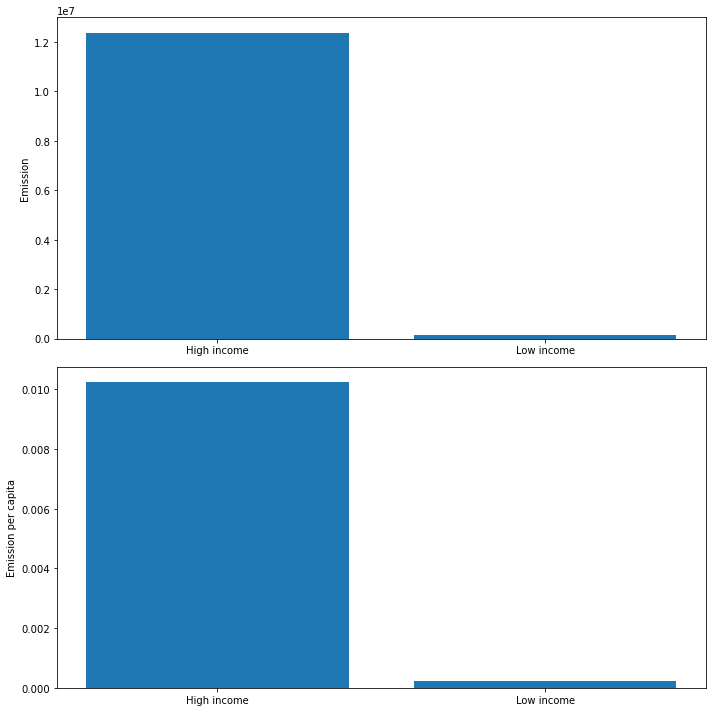

In [13]:
fig, ax = plt.subplots(nrows = 2,         
                       ncols = 1,         
                       figsize = (10, 10))

ax[0].bar(Emis_Pop_Regions_Income['Country'],Emis_Pop_Regions_Income["Emission"])
ax[1].bar(Emis_Pop_Regions_Income['Country'],Emis_Pop_Regions_Income["Emis_per_Cap"])
ax[0].set_ylabel("Emission")
ax[1].set_ylabel("Emission per capita")

fig.tight_layout()

plt.savefig('mandatory/Emission_Income_plot.png')

We see from this that High-Income countries have much larger CO2 emissions than low income countries. When compared to emissions per capita the results are the same. This is no surprise, high income countries tend to have large industries, and most industries have high emission. 

## c)


We use: Renewable energy consumption,GDP, GDP growth, Unemployment, Access to electricity, Urban Population %.

In [14]:

Ren_Ene = wb.download(indicator='EG.FEC.RNEW.ZS', country=['all'], start=2018, end=2018)

GDP = wb.download(indicator='NY.GDP.MKTP.CD', country=['all'],start=2018, end=2018)

GDP_growth = wb.download(indicator='NY.GDP.MKTP.KD.ZG', country=['all'],start=2018, end=2018)

Unempl = wb.download(indicator='SL.UEM.TOTL.ZS', country=['all'],start=2018, end=2018)

Elect = wb.download(indicator='EG.ELC.ACCS.ZS', country=['all'],start=2018, end=2018)

UrbPop = wb.download(indicator='SP.URB.TOTL.IN.ZS', country=['all'],start=2018, end=2018)


In [15]:

Liste = [Ren_Ene,GDP,GDP_growth,Unempl,Elect,UrbPop]
Liste2 = ['Ren_Ene','GDP','GDP_growth','Unempl','Elect','UrbPop']
Liste3 =['EG.FEC.RNEW.ZS','NY.GDP.MKTP.CD','NY.GDP.MKTP.KD.ZG','SL.UEM.TOTL.ZS','EG.ELC.ACCS.ZS','SP.URB.TOTL.IN.ZS']


In [16]:
def clean_datas(List,List2,Liste3):
    New_Liste = []
    for i in range(len(List)):
        List[i] = List[i].iloc[49:]
        List[i].reset_index(inplace=True)
        List[i] = List[i].rename(columns={'country':'Country','year':'Year',Liste3[i]:List2[i]}).copy()
        New_Liste.append(List[i])
    
    return New_Liste

In [17]:
All_Data = clean_datas(Liste,Liste2,Liste3)


We use this function and the for-loops in the function to avoid having a lot of unnecessary code. In the function we clean the datas in the same way we have cleaned data previously.

In [18]:
for i in range(len(All_Data)-1):

    for j in range(2):
        All_Data[i+1].drop(All_Data[i+1].columns[0],axis=1,inplace=True)

data6 = pd.concat(All_Data, axis=1)


Since we do not know how to merge several datasets we use the function "concat". In order to avoid getting several columns with "Country" and "Year", we first delete the columns "year" and "country" in all the datasets except for one.

In [19]:
data6.dropna(axis=0,inplace=True)


In [20]:
data6_merge = data6.merge(Emis_Pop,on=['Country','Year'],how='outer')

data6_merge.dropna(axis=0,inplace=True)



In [21]:
correlation=data6_merge.corr()

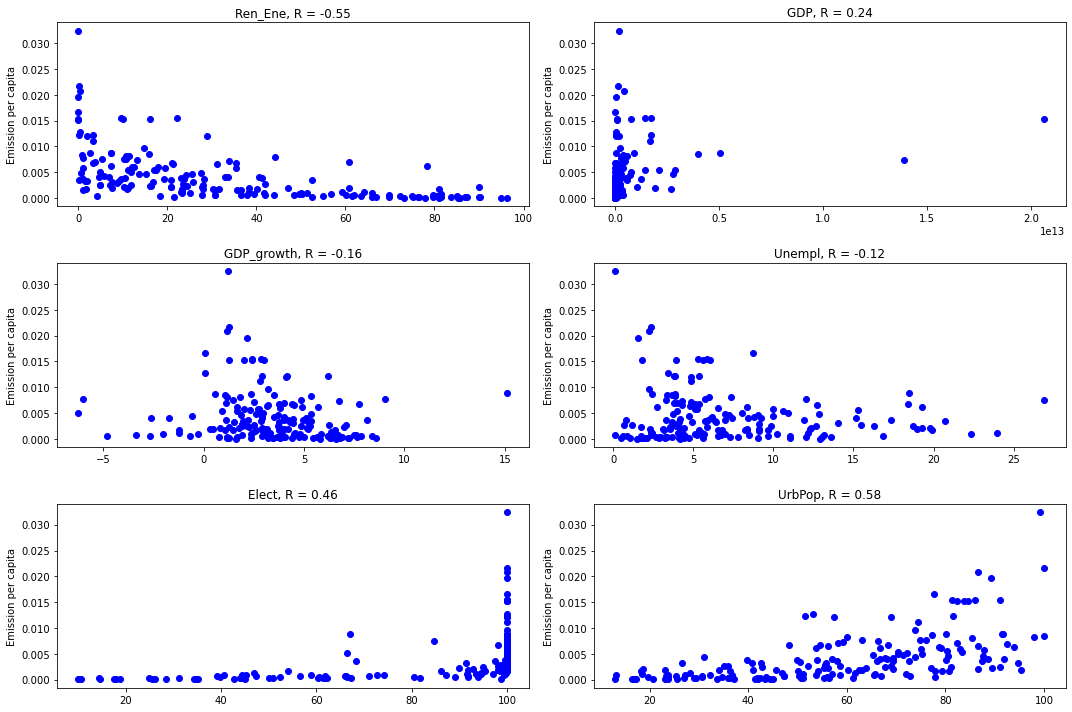

In [22]:
Liste4 = ['Ren_Ene','GDP','GDP_growth','Unempl','Elect','UrbPop']

rows=3
cols=2
n=0
fig, ax = plt.subplots(nrows = rows,        # 2 rows
                       ncols = cols,        # 2 columns
                       figsize = (15, 10))
for i in range(rows):
    for j in range(cols):
        ax[i,j].scatter(data6_merge[Liste4[n]],data6_merge["Emis_per_Cap"],
                    color="blue")
        
        ax[i,j].set_title(Liste4[n]+", R = "+ str(round(correlation.loc['Emis_per_Cap', Liste4[n]], 2)))
        ax[i,j].set_ylabel("Emission per capita")
        
        fig.tight_layout()
    
        n+=1

plt.savefig('mandatory/EpC_6R_plot.png')

Here we have analyzed the 6 indicators and CO2 emission per capita visually. We have used scatterplot to see the correlation between each indicators and Co2 emission. Moreover, "R" is the coeficcent for correlation and shows how good the indicators are.

In [23]:
import statsmodels.formula.api as smf


We will now do a multiple linear regression.

In [24]:
def get_model(formula, df):
    
    model = smf.ols(formula, data = df)

    model = model.fit()
    
    return model

In [25]:
Liste4 = ['Ren_Ene','GDP','GDP_growth','Unempl','Elect','UrbPop']

#formula1 = 'Emis_per_Cap ~ Ren_Ene + GDP + GDP_growth + Unempl + Elect + UrbPop'

formula = 'Emis_per_Cap ~ '+Liste4[0]+ ' + '+Liste4[1]+' + '+Liste4[2]+' + '+Liste4[3]+ ' + '+ Liste4[4] + ' + '+ Liste4[5]

model = get_model(formula, data6_merge)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Emis_per_Cap   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     26.17
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           7.97e-22
Time:                        13:47:28   Log-Likelihood:                 735.96
No. Observations:                 174   AIC:                            -1458.
Df Residuals:                     167   BIC:                            -1436.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0037      0.002      1.938      0.054   -7.05e-05       0.008
Ren_Ene    -7.042e-05   1.48e-05     -4.769      0.000   -9.96e-05   -4.13e-05
GDP         2.542e-16   1.42e-16      1.788      0.076   -2.65e-17    5.35e-16
GDP_growth -8.361e-05      0.000     -0.809      0.419      -0.000       0.000
Unempl        -0.0002   5.35e-05     -3.568      0.000      -0.000   -8.52e-05
Elect      -8.549e-06   1.63e-05     -0.524      0.601   -4.08e-05    2.37e-05
UrbPop      8.569e-05   1.49e-05      5.770      0.000    5.64e-05       0.000
==============================================================================
Omnibus:                       89.213   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.228
Skew:                           1.881   Prob(JB):                    3.88e-104
Kurtosis:                      10.178   Cond. No.                     1.43e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

answer on c)


A good indicator has a t-value above 2 in absolute values and consequently a p-value less than 0,05 given a 95% significanse level. Ren_Ene, Unempl and UrbPop are three significant indicators and good explanators of differences in CO2 emissions between countries. The three last indicators do not have a significant effect given a 95% significanse level.

We did not specific test for outliers, but from the scatter plots above from the correlations, we visually see some outliers, for example between GDP and emissions. There are not many outliers so we assume they will not have any big impacts on the regression results. We neither tested for linearity, but again we visually see that the indicators does not follow a straight line, so it is reasonable to say there are non-linearities. 

### d)

d)
Our indicators that explain most of the Co2 emission per capita is Renewable Energy, Unemployment and Urban population.


In [26]:
Li = ['Ren_Ene','Unempl','UrbPop']

formula1 = 'Emis_per_Cap ~ Ren_Ene + Unempl + UrbPop'
formula = 'Emis_per_Cap ~ '+Li[0]+ ' + '+Li[1]+' + '+Li[2]

model = get_model(formula, data6_merge)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Emis_per_Cap   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     50.67
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.90e-23
Time:                        13:47:32   Log-Likelihood:                 733.87
No. Observations:                 174   AIC:                            -1460.
Df Residuals:                     170   BIC:                            -1447.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0026      0.001      2.247      0.026       0.000       0.005
Ren_Ene    -6.756e-05   1.13e-05     -5.958      0.000   -8.99e-05   -4.52e-05
Unempl        -0.0002   5.26e-05     -3.672      0.000      -0.000   -8.92e-05
UrbPop      8.863e-05    1.4e-05      6.348      0.000    6.11e-05       0.000
==============================================================================
Omnibus:                       84.644   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.514
Skew:                           1.798   Prob(JB):                     3.59e-91
Kurtosis:                       9.672   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Task 2

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

from pandas_datareader import data
from pandas_datareader import wb


In [28]:
#Need to write the country code of the country you want data from.
def getCountryData(country):
    Emis2 = wb.download(indicator='EN.ATM.CO2E.KT', country=[country], start=2000, end=2018)
    Emis2.reset_index(inplace=True)
    Emis2 = Emis2.rename(columns={'country':'Country','year':'Year','EN.ATM.CO2E.KT':"Emission"}).copy()

    Pop2 = wb.download(indicator='SP.POP.TOTL', country=[country],start=2000, end=2018)
    Pop2.reset_index(inplace=True)
    Pop2 = Pop2.rename(columns={'country':'Country','year':'Year','SP.POP.TOTL':"Population"}).copy()

    Emis2_Pop2 = Emis2.merge(Pop2, on=['Country','Year'],how="outer")
    
    Emis2_Pop2["Emis_per_Cap"] = (Emis2_Pop2["Emission"]/Emis2_Pop2["Population"])

    return Emis2_Pop2


In [29]:
import pandas_datareader.data as web

SnP = web.DataReader("^GSPC", 
                       start='2000-1-1', 
                       end='2018-12-31', 
                       data_source='yahoo',
                    )

SnP.reset_index(inplace=True)
SnP_close = SnP[['Date','Adj Close']]


In [30]:
plt.style.use('default')

What country do you want to research? ps:write country code US


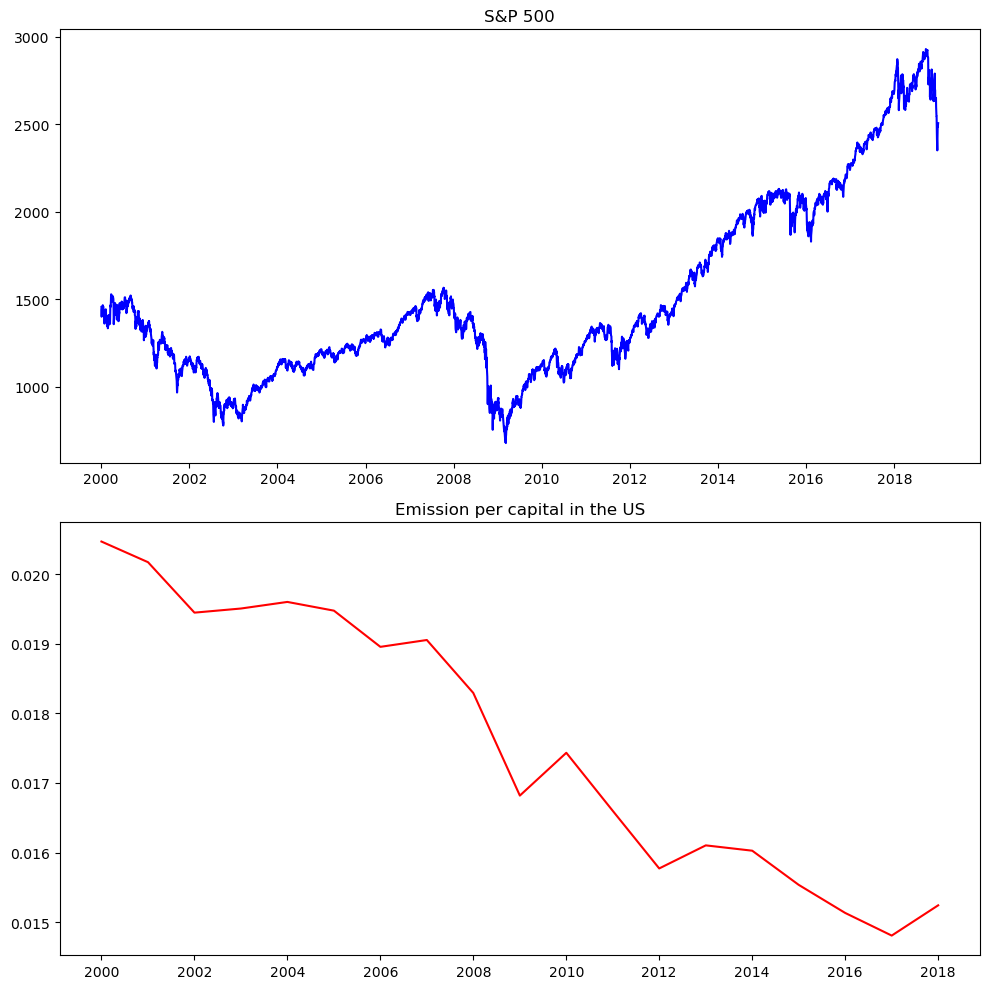

In [31]:
country_code = (input("What country do you want to research? ps:write country code ")).upper()
EmisData = getCountryData(country_code)

SnP['Date']=pd.to_datetime(SnP['Date'])
EmisData['Year']=pd.to_datetime(EmisData['Year'])



fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

ax[0].plot(SnP['Date'],
           SnP['Adj Close'],
      color="blue")

ax[1].plot(EmisData['Year'],
           EmisData["Emis_per_Cap"],
       color="red")

ax[0].set_title("S&P 500")
ax[1].set_title("Emission per capital in the "+ country_code)
fig.tight_layout()

plt.savefig('mandatory/S&P/'+country_code+'.png')